# Exploring Relationships in Airbnb Listings

This notebook explores relationships between numerical and categorical variables in the cleaned Airbnb listings dataset.  
The goal is to identify which factors most strongly relate to price and listing performance to guide future hypothesis testing.

In [10]:
## Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\rbaue\Desktop\airbnb_clean.csv")
df.head()

,id,name,neighbourhood,latitude,longitude,room_type,property_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,host_is_superhost,instant_bookable
0,90676,Short North - Italianate Cottage,Neighborhood highlights,39.98366,-83.00252,Entire home/apt,Entire home,128,1,868,5.11,155,t,f
1,591101,Bellows Studio Loft Apartment,Neighborhood highlights,39.96041,-82.98005,Private room,Private room in loft,112,2,342,2.14,339,t,f
2,927867,Full Private Room at the Hostel,Neighborhood highlights,40.01259,-83.00164,Private room,Private room in hostel,105,1,82,0.56,292,f,f
3,1183297,Hannah's Haus**Prime location in German Village**,Neighborhood highlights,39.95164,-82.99434,Entire home/apt,Entire home,253,30,87,1.80,288,t,f
4,1217678,Comfortable rooms in Clintonville 1,Neighborhood highlights,40.03869,-83.01728,Private room,Private room in home,74,1,283,1.90,342,t,f


In [11]:
## Select relevant variables

df_numeric = df.select_dtypes(include=['int64','float64'])
df_numeric = df_numeric.drop(columns=['id'], errors='ignore')
df_numeric.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,39.98366,-83.00252,128,1,868,5.11,155
1,39.96041,-82.98005,112,2,342,2.14,339
2,40.01259,-83.00164,105,1,82,0.56,292
3,39.95164,-82.99434,253,30,87,1.80,288
4,40.03869,-83.01728,74,1,283,1.90,342


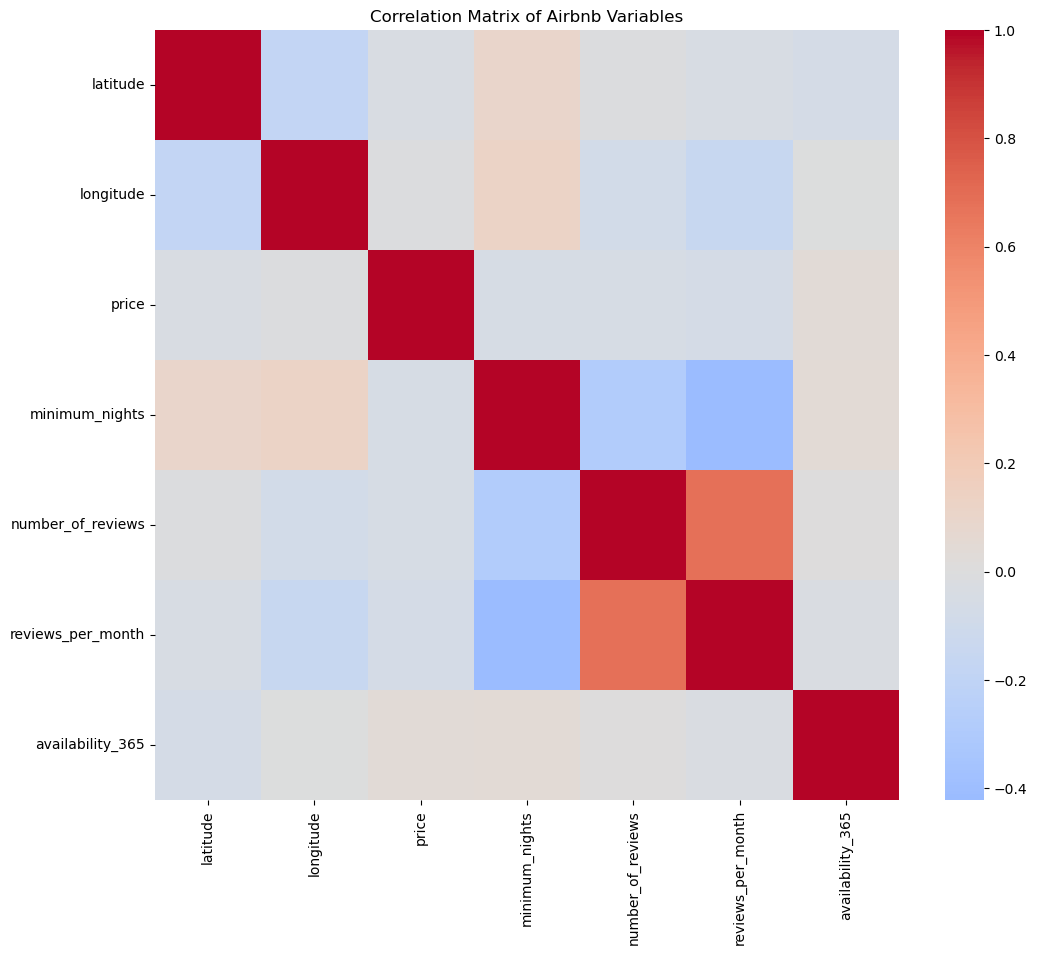

In [12]:
## Correlation heatmap

plt.figure(figsize=(12,10))
sns.heatmap(df_numeric.corr(), cmap="coolwarm", center=0)
plt.title("Correlation Matrix of Airbnb Variables")
plt.show()

The heatmap displays the strength and direction of relationships between numerical variables.  
Positive correlations (red) indicate variables that increase together, while negative correlations (blue) indicate inverse relationships.

In [13]:
## Strongest correlations to scatterplots

corr = df_numeric.corr()['price'].sort_values(ascending=False)
corr

price                1.000000
availability_365     0.036001
longitude           -0.015166
latitude            -0.030555
minimum_nights      -0.045017
number_of_reviews   -0.051385
reviews_per_month   -0.061703
Name: price, dtype: float64

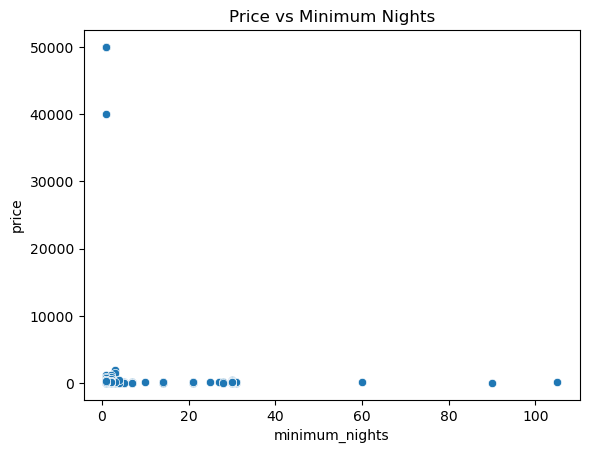

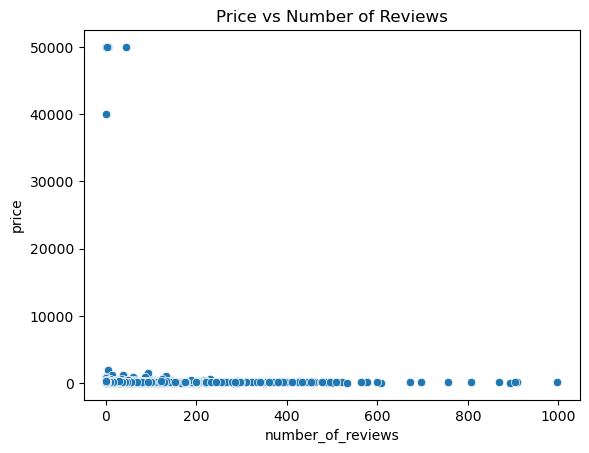

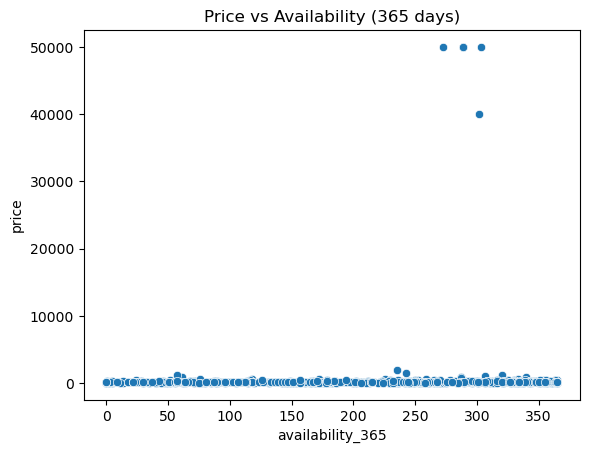

In [17]:
sns.scatterplot(x='minimum_nights', y='price', data=df)
plt.title("Price vs Minimum Nights")
plt.show()

sns.scatterplot(x='number_of_reviews', y='price', data=df)
plt.title("Price vs Number of Reviews")
plt.show()

sns.scatterplot(x='availability_365', y='price', data=df)
plt.title("Price vs Availability (365 days)")
plt.show()

Price shows a clear positive relationship with accommodates and number of bedrooms.  
Larger listings tend to charge higher nightly prices.

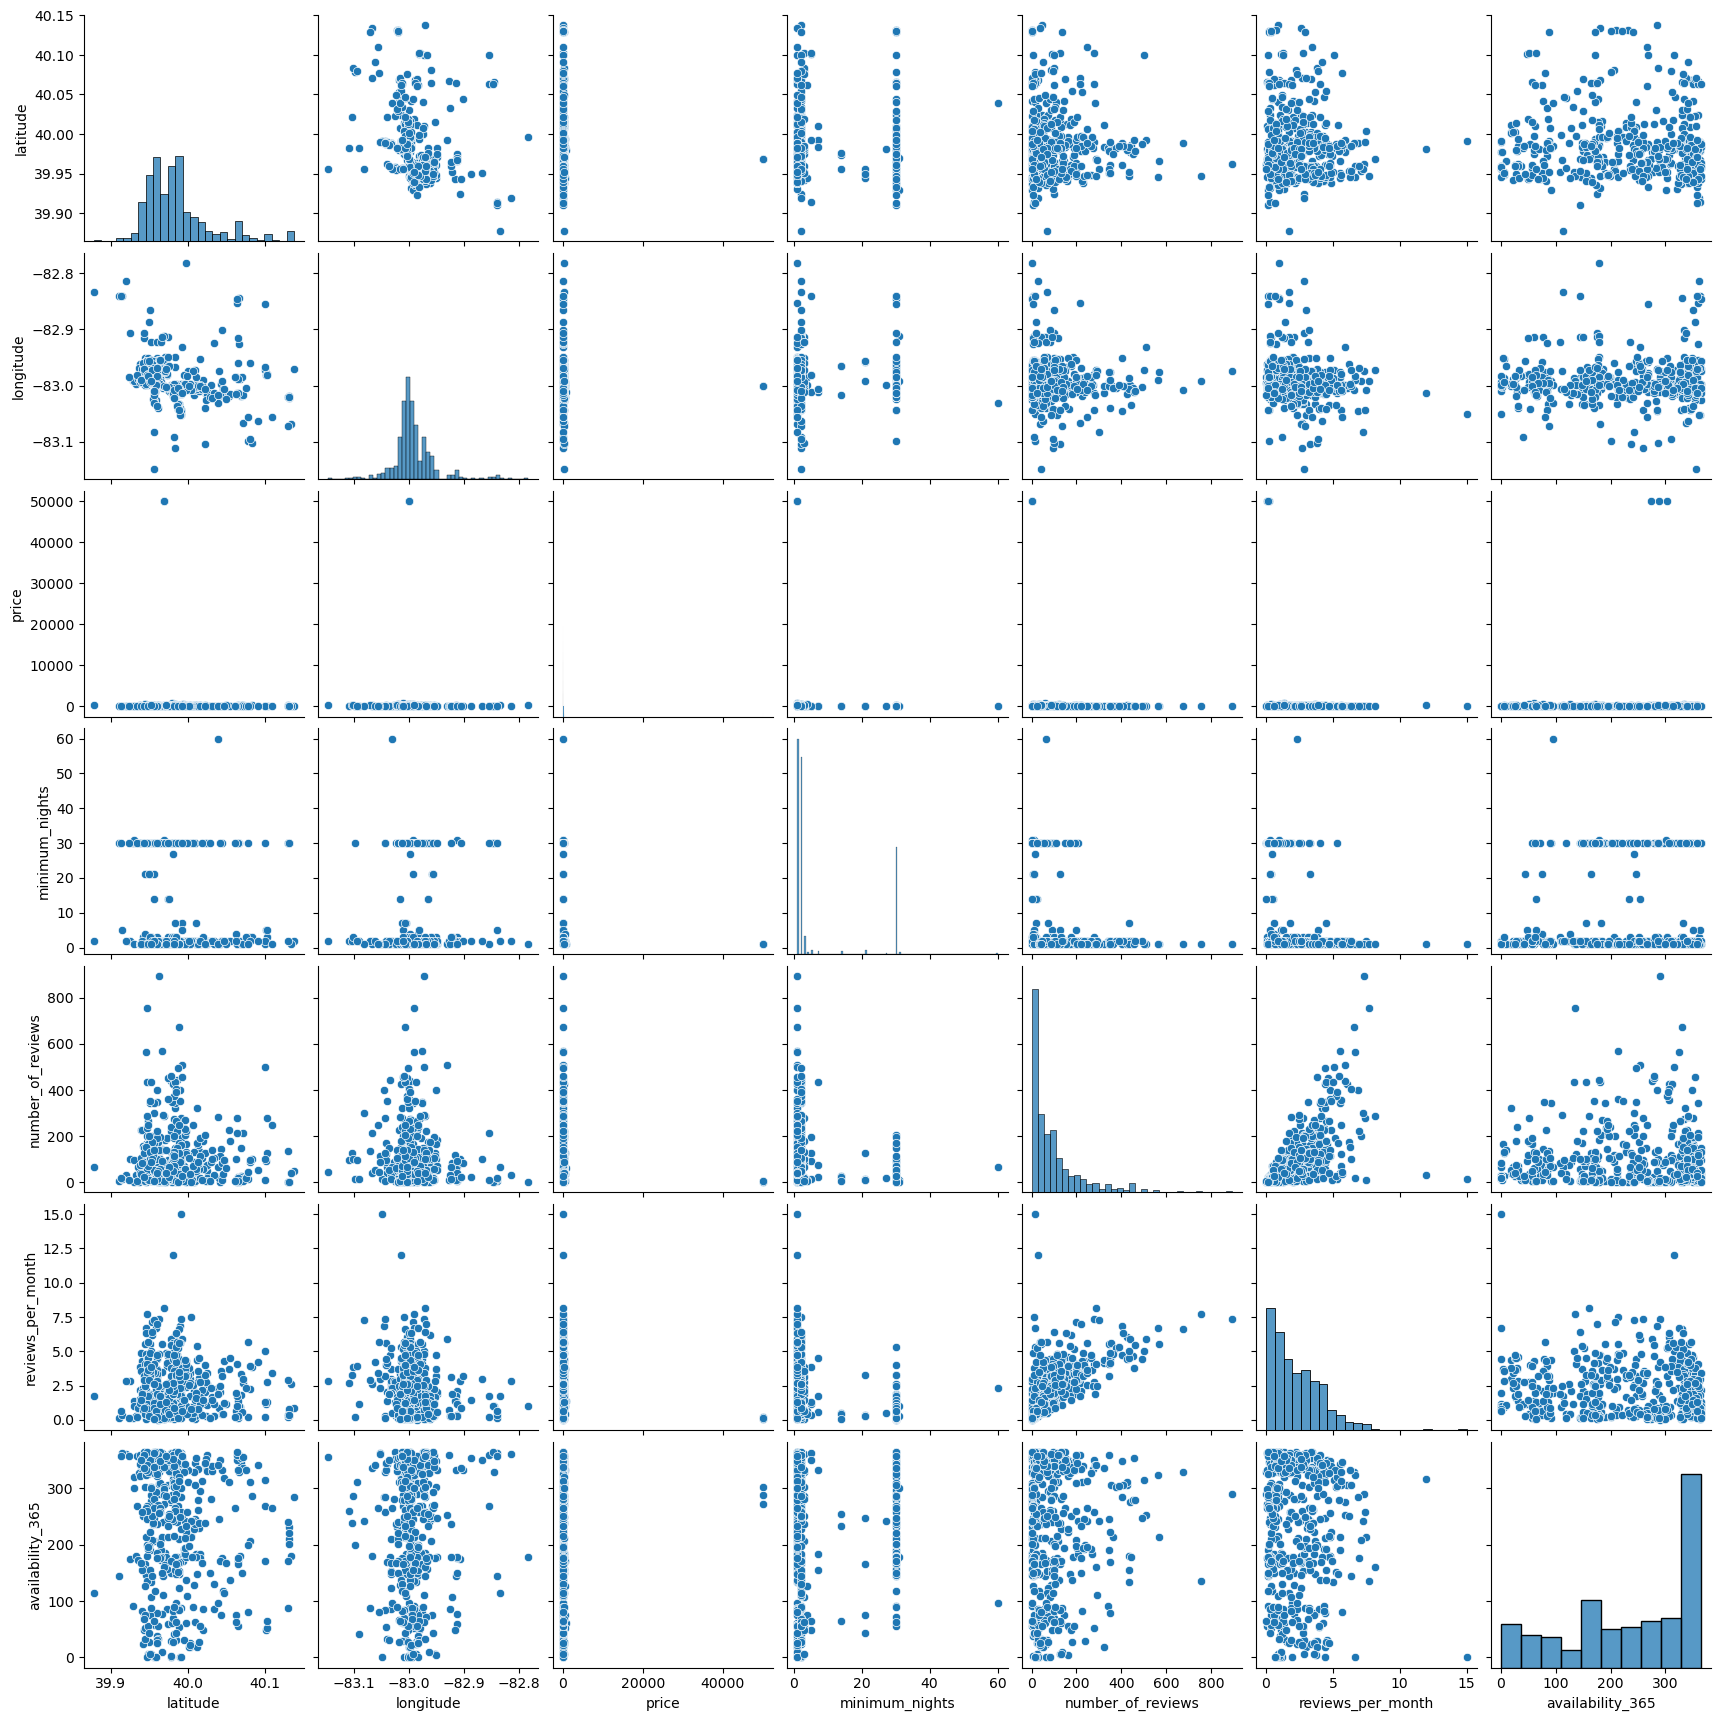

In [18]:
## Pair plot

sns.pairplot(df_numeric.sample(500))
plt.show()

The pair plot shows most numeric variables are right-skewed.  
Price, accommodates, and bedrooms show visible upward trends worth deeper analysis.

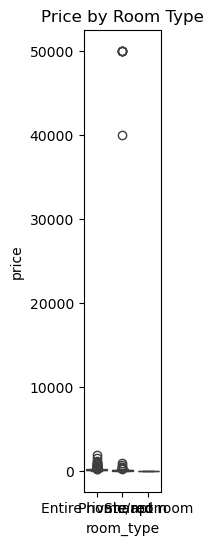

In [19]:
## Categorical plot

plt.figure(figsize=(1,6))
sns.boxplot(x='room_type', y='price', data=df)
plt.title("Price by Room Type")
plt.show()

Entire homes/apartments have significantly higher median prices than private or shared rooms.

### Updated Answers to Initial Questions

• Larger listings (accommodates, bedrooms) are associated with higher prices.  
• Entire home listings command significantly higher nightly rates.  
• Price distributions are highly skewed, indicating a small number of very expensive listings.

### Hypotheses

H1: Listings with more bedrooms have higher prices.  
H2: Entire home listings have higher prices than private rooms.  
H3: Listings that accommodate more guests charge higher nightly prices.